# 4. Quantum Fourier Transform

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

## Table of Contents

* [Introduction to Fourier Transforms](#IntroFT)
* [Discrete Fourier Transform](#DFT)
    * [DFT Example](#DFTex)
* [Quantum Fourier Transform](#QFT)

## Introduction to Fourier Transforms <a name="IntroFT"></a>

It is common in various fields to transform a problem that is difficult into some other problem that is easier to solve. One common technique is the Fourier transform. A Fourier transform transforms a time signal into the frequency domain, which shows the individual frequencies forming the considered signal. For example, consider some audio recording of a piano chord being played. In the time domain, this signal is a complex waveform varying with respect to time. By performing a Fourier transform on this time signal, it allows us to observe it in the "frequency domain" making it possible to identify the different frequencies present in the signal providing us with the knowledge of the notes being played in the chord. The Fourier transform makes it possible to identify dominant frequencies allowing for various post-processing routines to be done such as "compressing" the audio by retaining only the wanted frequencies which were identified in the frequency basis. Interestingly, the Fourier transformation can be computed with greater speed on a quantum computer than a classical one. 

## Discrete Fourier Transform <a name="DFT"></a>

The transform we will be focusing on is called the discrete Fourier transform (DFT). Classically, the DFT takes a vector of complex numbers $x_j = (x_0,\dots,x_{N-1})$ with finite length $N$ as input returing an output of the vector $\tilde{x}_k = (\tilde{x}_0,\dots,\tilde{x}_{N-1})$. The returned vector $\tilde{x}_k$ is also complex and is defined by 
$$\tilde{x}_k 
= \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_je^{2\pi i\frac{jk}{N}}.$$

### DFT Example <a name="DFTex"></a>

To understand the usefulness of the DFT, we will look at a common use case of this transformation in digital signal processing. This method will enable us to find the spectrum of a signal with some finite duration. Assume that $x(t) = \sin(2\pi t) + \sin(2\pi(11.2) t) + \sin(2\pi(18.4) t)$ is a continuous-time signal sampled at a rate of $100$ samples per second. 

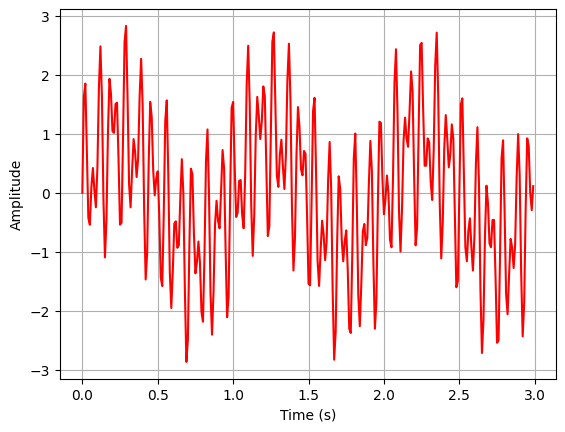

In [10]:
samp_rate = 100
samp_int = 1/samp_rate
t = np.arange(0,3,samp_int)
func = np.sin(2*np.pi*t) + np.sin(2*np.pi*11.2*t) + np.sin(2*np.pi*18.4*t)

plt.plot(t, func, 'r')
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel('Amplitude')
plt.show()

Since $x(t)$ is a continuous signal, we are only able to analyze it on a digital computer if we discretize it into some number of samples of $x(t)$ and analyze these instead. The plot above also only shows the first $3.0\text{ s}$ of our signal $x(t)$, which for all we know may continue far past this time for hours, years or even infinitely. A computer can obviously only process a finite number of samples, so to analyze this signal we must make an approximation and use a limited number of samples. To do this we will choose some finite duration sequence to represent the continuous time signal. Taking $1$ second of equally spaced samples yields the plot below.

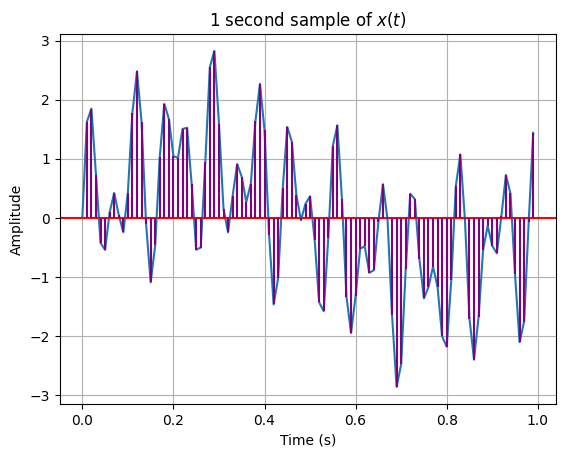

In [11]:
plt.plot(t[:samp_rate], func[:samp_rate])
plt.axhline(y=0, color='r')
plt.vlines(x = t[:samp_rate], ymin = 0, ymax = func[:samp_rate], color = 'purple')
plt.grid()
plt.title("$1$ second sample of $x(t)$")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

Applying the DFT where $x_j$ are the samples of $x$, we get the frequency amplitudes $\tilde{x}_k$ below.

In [5]:
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(2j * np.pi * k * n / N)
    X = np.dot(W, x)/(np.sqrt(N))
    return X

In [6]:
X = dft(func[:samp_rate])
#print("DFT coefficients X'(k):",X)

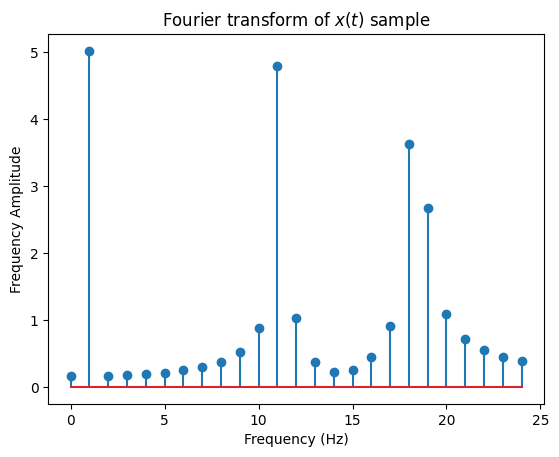

In [7]:
N=len(X)
n=np.arange(N)
T=N/samp_rate
freq = n/T
plt.stem(freq[:25],abs(X)[:25])
plt.title("Fourier transform of $x(t)$ sample")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Frequency Amplitude")
plt.show()

Here we can see that the frequency amplitudes peak at the values $1, 11.2,$ and $18.4$, which are the frequencies composing $x(t)$. Suppose that the frequencies of a wave are given rather than its time-based representation. To construct the waveform composed of these frequencies, the inverse discrete Fourier transform (IDFT) can be applied. The inverse transform converts from the frequency domain to the time domain, allowing waveforms to be constructed from their frequencies. The IDFT takes as input the complex vector $\tilde{x}_k$ in the frequency basis and transforms it to the complex vector $x_j$ in the time basis defined by
$$x_j = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\tilde{x}_ke^{-2\pi i\frac{jk}{N}}.$$ 
Performing this transformation on the obtained frequency amplitudes, we obtain the reconstructed time signal sample below.

In [12]:
def inv_dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(x, W)/(np.sqrt(N))
    return X

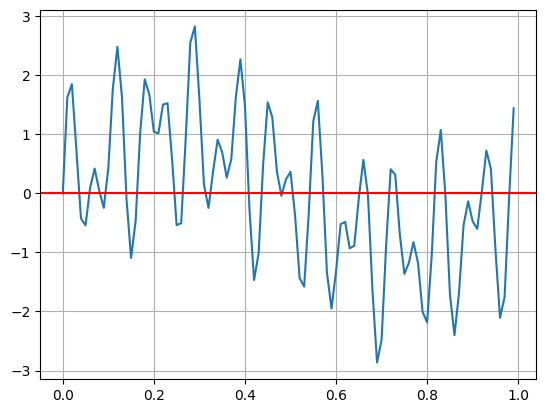

In [13]:
Y = inv_dft(X)
plt.plot(t[:samp_rate],Y)
plt.axhline(y=0, color='r')
plt.grid()
plt.show()

## Quantum Fourier Transform <a name="QFT"></a>

The quantum Fourier transform is functionally the same transformation as the DFT, however, instead of acting on a generic vector, it is explicitly applied to a quantum state vector. Let $j\in \mathbb{N}$ and $n$ be the number of qubits. The (forward) quantum Fourier transform (QFT) is defined as the map
$$|j\rangle 
\mapsto \frac{1}{\sqrt{2^n}}\sum_{k=0}^{2^n-1}e^{2\pi i\frac{jk}{2^n}}|k\rangle.$$
The QFT can be expressed using the unitary matrix
$$\text{QFT}_{n} = \frac{1}{\sqrt{2^n}}\sum_{j=0}^{2^n-1}\sum_{k=0}^{2^n-1}e^{2\pi i\frac{jk}{2^n}}|k\rangle \langle j|.$$

Since this is a linear system, QFT acting on a state $|x\rangle$ can be written as a matrix-vector multiplication, i.e.,
$$\text{QFT}_n|x\rangle 
= \begin{pmatrix}1 & 1 & 1 & \dots & 1 \\ 1 & \omega & \omega ^2 & \dots & \omega ^{2^n-1} \\ 1 & \omega ^2 & \omega ^4 & \dots & \omega^{2(2^n-1)} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & \omega ^{2^n-1} & \omega ^{2(2^n-1)} & \dots & \omega ^{(2^n-1)^2} \end{pmatrix} \begin{pmatrix}x_0\\ x_1\\ x_2\\ \vdots \\ x_{2^n-1} \end{pmatrix} 
= \begin{pmatrix}\tilde{x}_0\\ \tilde{x}_1\\ \tilde{x}_2\\ \vdots \\ \tilde{x}_{2^n-1} \end{pmatrix}$$
where $\omega = e^{2\pi i\frac{jk}{2^n}}$. This way it is very clear to see how the QFT is effectively a matrix transforming a vector of amplitudes. Conveniently, this is a unitary matrix and thus a valid quantum operator meaning a quantum algorithm can be constructed to implement this transformation.

With this matrix representation, we can easily visualize the QFT for any number of qubits:

$$\text{QFT}_n 
= \frac{1}{\sqrt{2^n}}\begin{pmatrix}1 & 1 & 1 & \dots & 1 \\ 1 & \omega & \omega ^2 & \dots & \omega ^{2^n-1} \\ 1 & \omega ^2 & \omega ^4 & \dots & \omega^{2(2^n-1)} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & \omega ^{2^n-1} & \omega ^{2(2^n-1)} & \dots & \omega ^{(2^n-1)^2} \end{pmatrix} \begin{pmatrix}x_0\\ x_1\\ x_2\\ \vdots \\ x_{2^n-1} \end{pmatrix}$$

$$\text{QFT}_0 
= \frac{1}{\sqrt{1}}\begin{pmatrix}1 \end{pmatrix} 
= \begin{pmatrix}1 \end{pmatrix}$$

$$\text{QFT}_1 
= \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & \omega \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & e^{\frac{2\pi i}{N}} \end{pmatrix} 
= \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & \cos(\frac{2\pi}{2}) + i \sin(\frac{2\pi}{2}) \end{pmatrix} 
= \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & \cos(\pi) + i \sin(\pi) \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1 \end{pmatrix} 
= H$$

$% \text{QFT}_3 
% = \frac{1}{\sqrt{3}}\begin{pmatrix}1 & 1 & 1 \\ 1 & \omega & \omega ^2 \\ 1 & \omega ^2 & \omega ^4 \end{pmatrix} 
% = \frac{1}{\sqrt{3}}\begin{pmatrix}1 & 1 & 1 \\ 1 &  e^{\frac{2\pi i}{N}} &  e^{\frac{4\pi i}{N}} \\ 1 &  e^{\frac{4\pi i}{N}} &  e^{\frac{8\pi i}{N}} \end{pmatrix} 
% = \frac{1}{\sqrt{3}}\begin{pmatrix}1 & 1 & 1 \\ 1 &  \cos(\frac{2\pi}{3}) + i \sin(\frac{2\pi}{3}) &  \cos(\frac{4\pi}{3}) + i \sin(\frac{4\pi}{3}) \\ 1 & \cos(\frac{4\pi}{3}) + i \sin(\frac{4\pi}{3}) &  \cos(\frac{8\pi}{3}) + i \sin(\frac{8\pi}{3}) \end{pmatrix} 
% = \frac{1}{\sqrt{3}}\begin{pmatrix}1 & 1 & 1 \\ 1 & \frac{-1 + i\sqrt{3}}{2} & \frac{-1 - i\sqrt{3}}{2} \\ 1 & \frac{-1 - i\sqrt{3}}{2} &  \frac{-1 + i\sqrt{3}}{2} \end{pmatrix}$

$$\text{QFT}_3 = \frac{1}{\sqrt{8}}\begin{pmatrix}1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\ 1 & \omega & \omega ^2 & \omega ^3 & \omega ^4 & \omega ^5 & \omega ^6 & \omega ^7 \\ 1 & \omega ^2 & \omega ^4 & \omega ^6 & \omega ^8 & \omega ^{10} & \omega ^{12} & \omega ^{14} \\ 1 & \omega ^3 & \omega ^6 & \omega ^9 & \omega ^{12} & \omega ^{15} & \omega ^{18} & \omega ^{21} \\ 1 & \omega ^4 & \omega ^8 & \omega ^{12} & \omega ^{16} & \omega ^{20} & \omega ^{24} & \omega ^{28} \\ 1 & \omega ^5 & \omega ^{10} & \omega ^{15} & \omega ^{20} & \omega ^{25} & \omega ^{30} & \omega ^{35} \\ 1 & \omega ^6 & \omega ^{12} & \omega ^{18} & \omega ^{24} & \omega ^{30} & \omega ^{36} & \omega ^{42} \\ 1 & \omega ^7 & \omega ^{14} & \omega ^{21} & \omega ^{28} & \omega ^{35} & \omega ^{42} & \omega ^{49} \end{pmatrix} = \frac{1}{2\sqrt{2}}\begin{pmatrix}1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\ 1 & e^{\frac{\pi i}{4}} & e^{\frac{\pi i}{2}} & e^{\frac{3\pi i}{4}} & e^{\pi i} & e^{\frac{4\pi i}{4}} & e^{\frac{3\pi i}{2}} & e^{\frac{7\pi i}{4}} \\ 1 & e^{\frac{\pi i}{2}} & e^{\pi i} & e^{\frac{3\pi i}{2}} & e^{2\pi i} & e^{\frac{5\pi i}{2}} & e^{3\pi i} & e^{\frac{7\pi i}{2}} \\ 1 & e^{\frac{3\pi i}{4}} & e^{\frac{3\pi i}{2}} & e^{\frac{9\pi i}{4}} & e^{3\pi i} & e^{\frac{15\pi i}{4}} & e^{\frac{9\pi i}{2}} & e^{\frac{21\pi i}{4}} \\ 1 & e^{\pi i} & e^{2\pi i} & e^{3\pi i} & e^{4\pi i} & e^{5\pi i} & e^{6\pi i} & e^{\frac{35\pi i}{4}} \\ 1 & e^{\frac{3\pi i}{2}} & e^{3\pi i} & e^{\frac{9\pi i}{2}} & e^{6\pi i} & e^{\frac{15\pi i}{2}} & e^{9\pi i} & e^{\frac{21\pi i}{2}} \\ 1 & e^{\frac{7\pi i}{4}}& e^{\frac{7\pi i}{2}} & e^{\frac{21\pi i}{4}} & e^{7\pi i} & e^{\frac{35\pi i}{4}} & e^{\frac{21\pi i}{2}} & e^{\frac{49\pi i}{4}} \end{pmatrix}$$

$$ = \frac{1}{2\sqrt{2}}\begin{pmatrix}1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\ 1 & \frac{1+i}{\sqrt{2}} & i & \frac{-1+i}{\sqrt{2}} & -1 & \frac{-1-i}{\sqrt{2}} & -i & \frac{1-i}{\sqrt{2}} \\ 1 & i & -1 & -i & 1 & i & -1 & -i \\ 1 & \frac{-1+i}{\sqrt{2}} & -i & \frac{1+i}{\sqrt{2}} & -1 & \frac{1-i}{\sqrt{2}} & i & \frac{-1-i}{\sqrt{2}} \\ 1 & -1 & 1 & -1 & 1 & -1 & 1 & -1 \\ 1 & \frac{-1-i}{\sqrt{2}} & i & \frac{1-i}{\sqrt{2}} & -1 & \frac{1+i}{\sqrt{2}} & -i & \frac{-1+i}{\sqrt{2}} \\ 1 & -i & -1 & i & 1 & -i & -1 & i \\ 1 & \frac{1-i}{\sqrt{2}} & -i & \frac{-1-i}{\sqrt{2}} & -1 & \frac{-1+i}{\sqrt{2}} & i & \frac{1+i}{\sqrt{2}} \end{pmatrix} $$

Looking at the QFT for a single qubit when $n=1$, this is simply the Hadamard gate. As we know, this gate transforms the computational basis states $|0\rangle$ and $|1\rangle$ to the Fourier-basis states $|+\rangle$ and $|-\rangle$, respectively. Similarly, every multi-qubit state in the computational basis has a corresponding Fourier basis state. As mentioned above, the $\text{QFT}$ is just a transformation between these two bases. States in the Fourier basis are often denoted with a tilde (~). For example, the $\text{QFT}$ acting on the state $|x\rangle$ is notated as 

$$\text{QFT}|x\rangle = |\tilde{x}\rangle.$$

What about $\text{QFT}$ for large values of $n$? The QFT map can be rewritten using fractional binary notation where $k$ and $j$ are binary numbers, i.e.,
$$k=
k_1k_2\dots k_{n}.0 \ , 
\qquad 
j
=j_1j_2\dots j_{n}.0 \ .$$
Therefore, $\text{QFT}_n$ acting on a state $|j\rangle$ can be written as
$$\text{QFT}_n|j\rangle 
= \frac{1}{\sqrt{2^n}}\sum_{k=0}^{2^n-1}e^{2\pi i\frac{jk}{2^n}}|k\rangle 
= \frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1}e^{2\pi i \left(\sum_{l=1}^n k_l\frac{j}{2^{l}}\right)}|k\rangle 
= \frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1}\prod_{l=1}^{n}e^{2\pi ik_l\frac{j}{2^{l}}}|k\rangle,$$
where
$$\frac{jk}{2^n} 
= k_1\frac{j}{2^1} + k_2\frac{j}{2^2} + \dots + k_{n}\frac{j}{2^n} 
= \sum_{l=1}^n k_l\frac{j}{2^{l}}.$$
Since $k$ is a binary number, each $k_n$ can only be $0$ or $1$. Thus the sum over $k$ becomes the direct product of the sum of each individual $k_n$ from $0$ to $1$, i.e.,
$$\text{QFT}_n|j\rangle 
= \frac{1}{\sqrt{2^n}} \sum_{k_1=0}^{1}e^{2\pi ik_1\frac{j}{2^{1}}}|k_1\rangle \otimes \sum_{k_2=0}^{1}e^{2\pi ik_2\frac{j}{2^{2}}}|k_2\rangle\otimes \cdots \otimes \sum_{k_n=0}^{1}e^{2\pi ik_n\frac{j}{2^{n}}}|k_n\rangle.$$
This can be rewritten as multiple tensor products, i.e.,
$$\text{QFT}_n|j\rangle 
= \frac{1}{\sqrt{2^n}}\bigotimes_{k=1}^{n}\left(|0\rangle + e^{2\pi i\frac{j}{2^{k}}}|1\rangle \right).$$

In order to really understand what is happening between these two bases, we can look at how different states in each basis is represented on the Bloch sphere. The .gif's in $\text{Fig. }1$ and $\text{Fig. }2$ are taken from the Qiskit notebook on the QFT and show very clearly how a number in the computational and Fourier bases are represented with 4 qubits. In the computational basis, we can see that the leftmost qubit has the highest "flipping" frequency where it flips with every step up. The second qubit, qubit $1$, flips twice as frequently as qubit $0$, and the next twice as much as that and the pattern continues. So any subsequent qubit in the computational basis will have double the frequency as the qubit before it and so on. 

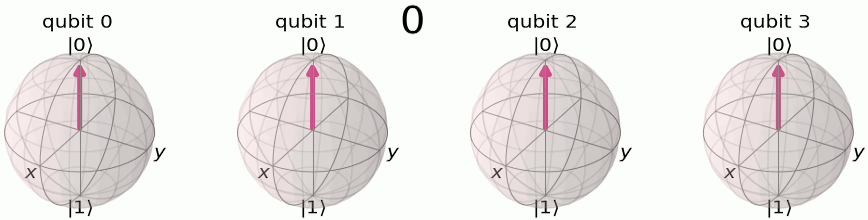

$$\textbf{Fig. }1:\text{ Counting in Computational Basis}$$

Looking at how we count in the Fourier basis in $\text{Fig. }2$, we can see that each number is instead represented as a rotation around the $Z$-axis. Starting with the $|\tilde{0}\rangle$ state, every qubit is in the $|+\rangle$ state. Each number in the Fourier basis tells us exactly how many turns the leftmost qubit makes around the $Z$-axis by the formula $\frac{a}{2^n}$ where $a$ is the number we want to store and $n$ is again the number of qubits. For example, to encode the state $|\tilde{7}\rangle$ on $4$ qubits as shown in $\text{Fig. }2$, we simply do $\frac{a}{2^n} = \frac{7}{2^4} = \frac{7}{16}$ full turns around the $Z$-axis which is equivalent to $2\pi\times\frac{7}{16} = \frac{7\pi}{8}$ because $2\pi \equiv \text{One Full Rotation}$. The next qubit is rotated double as much as the previous $(2\times \frac{7\pi}{8} = \frac{7\pi}{4})$ and so on for all subsequent qubits. In the Fourier basis, the leftmost qubit now has the lowest frequency whereas in the computational basis the leftmost qubit had the highest.

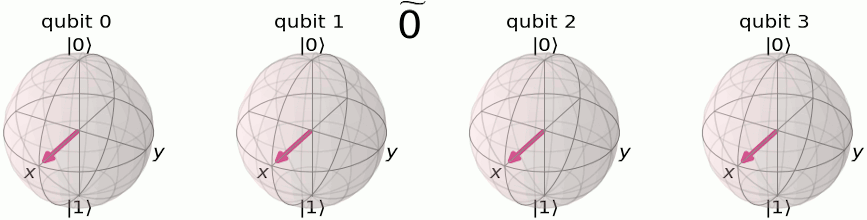

$$\textbf{Fig. }2:\text{ Counting in Fourier Basis}$$

# Inductive Proof